# Simulations from Calibrated EWMA, GARCH, Asymmetric GARCH Models

### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import statistics 
from scipy.stats import skew, kurtosis

### Simulate 500,000 runs using calibrated EWMA model

In [ ]:
def EWMA(mu = 0.07, days = 252, # number of trading days in a year 
         simulation = 500000, lambda_ewma = 0.94228572459567, 
         return_0817 = 0.00332311593171512, variance_0817 = 0.0000303281222425043, random_seed = 42):
  
  np.random.seed(random_seed)
  SnP_return = np.full(days, np.nan)
  SnP_variance = np.full(days, np.nan)
  SnP_simulation = pd.DataFrame({"SnP_return": np.full(simulation, np.nan)})
  for i in range(simulation):
        for j in range(days):
          if j == 0:
              return_step = return_0817
              variance_step = variance_0817
          else:
              return_step = SnP_return[j - 1]
              variance_step = SnP_variance[j - 1]
          SnP_variance[j] = lambda_ewma * variance_step + (1 - lambda_ewma) * (return_step ** 2) 
          SnP_return[j] = np.random.normal(loc = mu / days, scale = np.sqrt(SnP_variance[j]), size=1)        
        SnP_simulation.SnP_return[i] = sum(SnP_return)
  print("variance : {}".format(statistics.variance(SnP_simulation.SnP_return)))
  print("skewness : {}".format(skew(SnP_simulation.SnP_return)))
  print("kurtosis : {}".format(kurtosis(SnP_simulation.SnP_return)))
  return SnP_simulation.hist(bins=60);

variance : 0.007532012748282888
skewness : 0.11902546681498365
kurtosis : 3.3636352981388553


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f440001c2d0>]],
      dtype=object)

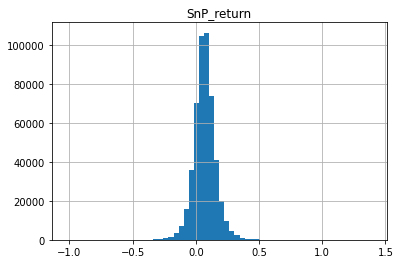

In [ ]:
EWMA()

### Simulate 500,000 runs using calibrated GARCH model

In [ ]:
def GARCH(mu = 0.07, days = 252, simulation = 500000, 
          alpha = 0.179260438702543, beta = 0.73834793924736, omega = 0.00000490401597713357, 
          return_0817 = 0.00332311593171512, variance_0817 = 0.0000469278994763082, random_seed = 42):
  
    np.random.seed(random_seed)
    SnP_return = np.full(days, np.nan)
    SnP_variance = np.full(days, np.nan)
    SnP_simulation = pd.DataFrame({"SnP_return": np.full(simulation, np.nan)})
    for i in range(simulation):
        for j in range(days):
            if j == 0:
                return_step = return_0817
                variance_step = variance_0817
            else:
                return_step = SnP_return[j - 1]
                variance_step = SnP_variance[j - 1]
            SnP_variance[j] = omega + alpha * (return_step ** 2) + beta * variance_step
            SnP_return[j] = np.random.normal(loc = mu / days, scale = np.sqrt(SnP_variance[j]), size=1)
        SnP_simulation.SnP_return[i] = sum(SnP_return)
    print("variance : {}".format(statistics.variance(SnP_simulation.SnP_return)))
    print("skewness : {}".format(skew(SnP_simulation.SnP_return)))
    print("kurtosis : {}".format(kurtosis(SnP_simulation.SnP_return)))
    return SnP_simulation.hist(bins=60);

variance : 0.014812512988893335
skewness : 0.024663123636017286
kurtosis : 0.32223609491141225


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43ffedbe50>]],
      dtype=object)

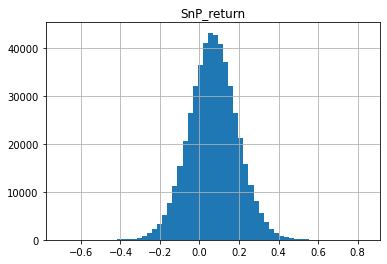

In [ ]:
GARCH()

### Simulate 500,000 runs using calibrated Asymmetric GARCH model

In [ ]:
def Asym_GARCH(mu = 0.07, days = 252, simulation = 500000,
               alpha = 0.184057286480194, beta = 0.721316441932653, omega = 0.000000695143902985949, kappa = 0.00561394523987828,
               return_0817 = 0.00332311593171512, variance_0817 = 0.0000451127643032176, random_seed = 42):
   
    np.random.seed(random_seed)
    SnP_return = np.full(days, np.nan)
    SnP_variance = np.full(days, np.nan)
    SnP_simulation = pd.DataFrame({"SnP_return": np.full(simulation, np.nan)})
    for i in range(simulation):
        for j in range(days):
            if j == 0:
                return_step = return_0817
                variance_step = variance_0817
            else:
                return_step = SnP_return[j - 1]
                variance_step = SnP_variance[j - 1]
            SnP_variance[j] = omega + alpha * ((return_step - kappa) ** 2) + beta * variance_step
            SnP_return[j] = np.random.normal(loc = mu / days, scale = np.sqrt(SnP_variance[j]), size=1)
        SnP_simulation.SnP_return[i] = sum(SnP_return)
    print("variance : {}".format(statistics.variance(SnP_simulation.SnP_return)))
    print("skewness : {}".format(skew(SnP_simulation.SnP_return)))
    print("kurtosis : {}".format(kurtosis(SnP_simulation.SnP_return)))
    return SnP_simulation.hist(bins=60);

variance : 0.015517356902685457
skewness : -0.4815753983021913
kurtosis : 0.7312252767136096


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43ffd91850>]],
      dtype=object)

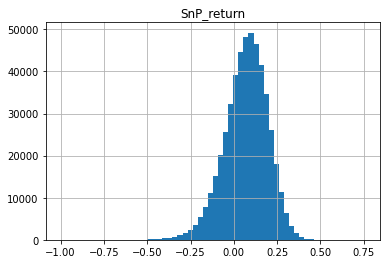

In [ ]:
Asym_GARCH()